### 1. Load the data

In [2]:
import numpy as np
import pandas as pd
from glob import glob
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf

from keras.preprocessing import image
train = pd.read_csv("../../scene-classification/train.csv")
train_image = []
for i in range(train.shape[0]):
#     print(train['image_name'][i])
    img = image.load_img('../../scene-classification/train/'+train['image_name'][i], target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [3]:
from keras.utils import to_categorical
y=train['label'].values

(17034,)


### 2.Image Augmentation

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# print shape of training set
print('x_train shape:', x_train.shape)
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape: (10901, 150, 150, 3)
10901 train samples
3407 test samples
2726 validation samples


### 3.Initial model architecture

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model = Sequential()

model.add(Conv2D(300,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(200,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(200,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(150,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(150,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

W1002 11:15:43.389975 139784515929856 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1002 11:15:43.398678 139784515929856 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 300)     8400      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 146, 146, 200)     540200    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 200)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 27, 27, 200)       360200    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 150)       270150    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 150)       202650    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 100)       135100    
__________

In [7]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

W1002 11:16:00.461729 139784515929856 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1002 11:16:00.467791 139784515929856 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), verbose=1, shuffle=True)

W1002 11:16:06.715460 139784515929856 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 10901 samples, validate on 2726 samples
Epoch 1/20
10901/10901 [==============================] - 277s 25ms/step - loss: 1.3772 - acc: 0.4343 - val_loss: 1.1126 - val_acc: 0.5657
Epoch 2/20
10901/10901 [==============================] - 265s 24ms/step - loss: 1.1559 - acc: 0.5444 - val_loss: 1.0089 - val_acc: 0.6093
Epoch 3/20
10901/10901 [==============================] - 265s 24ms/step - loss: 1.0401 - acc: 0.5926 - val_loss: 0.8550 - val_acc: 0.6552
Epoch 4/20
10901/10901 [==============================] - 265s 24ms/step - loss: 0.8885 - acc: 0.6696 - val_loss: 0.7225 - val_acc: 0.7506
Epoch 5/20
10901/10901 [==============================] - 265s 24ms/step - loss: 0.7714 - acc: 0.7343 - val_loss: 0.6977 - val_acc: 0.7494
Epoch 6/20
10901/10901 [==============================] - 265s 24ms/step - loss: 0.6902 - acc: 0.7681 - val_loss: 0.5585 - val_acc: 0.8001
Epoch 7/20
10901/10901 [==============================] - 265s 24ms/step - loss: 0.6388 - acc: 0.7923 - val_loss: 0.5

In [10]:
model.save("../../model_weights/CNN-final-Model.h5")

### Calculate classification accuracy on test set

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8655708835276824


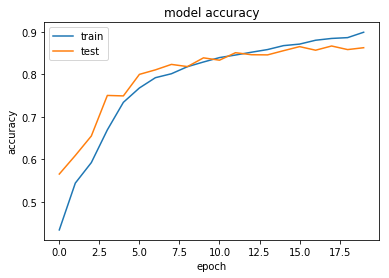

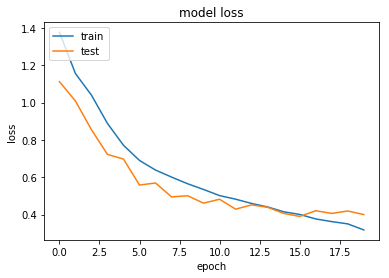

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


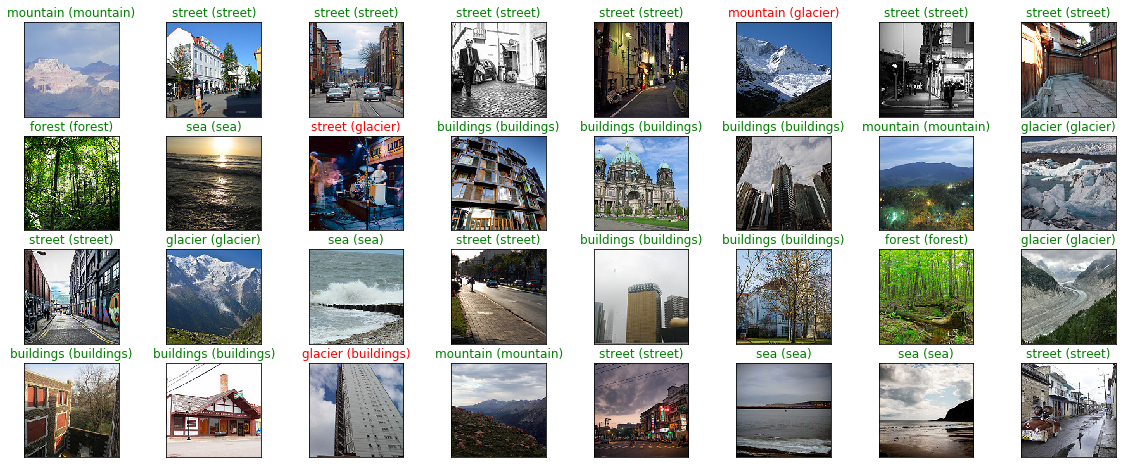

In [25]:
# get predictions on the test set
y_hat = model.predict(x_test)

classification_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
import matplotlib.pyplot as plt
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = y_test[idx]
    ax.set_title("{} ({})".format(classification_labels[pred_idx], classification_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))